In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [6]:
swings_2024 = pd.read_csv("swings_2024_outlier_added.csv", index_col = 0)

In [7]:
swings_2024

pitch_type   game_date  release_speed       player_name  batter  \
0              FF  2024-09-30           94.2       Díaz, Edwin  621566   
1              CU  2024-09-30           86.4   Johnson, Pierce  596019   
2              SL  2024-09-30           89.7       Díaz, Edwin  542303   
3              SL  2024-09-30           89.5       Díaz, Edwin  542303   
4              FF  2024-09-30           96.9       Díaz, Edwin  542303   
...           ...         ...            ...               ...     ...   
196956         SI  2024-04-03           92.3     Keller, Mitch  682928   
196957         FF  2024-04-03           92.4     Keller, Mitch  682928   
196958         CH  2024-04-03           83.3  Williams, Trevor  668804   
196959         CH  2024-04-03           82.5  Williams, Trevor  665833   
196960         CH  2024-04-03           83.1  Williams, Trevor  665833   

        pitcher     events      description  \
0        621242  field_out    hit_into_play   
1        572955   home_run    hit_into_play   
2        621242  strikeout  swinging_strike   
3        621242        NaN  swinging_strike   
4        621242        NaN             foul   
...         ...        ...              ...   
196956   656605  field_out    hit_into_play   
196957   656605        NaN             foul   
196958   592866  field_out    hit_into_play   
196959   592866  strikeout  swinging_strike   
196960   592866        NaN             foul   

                                                      des  zone  ...  \
0       Matt Olson pops out to shortstop Francisco Lin...  12.0  ...   
1       Francisco Lindor homers (33) on a fly ball to ...   8.0  ...   
2                     Marcell Ozuna strikes out swinging.   6.0  ...   
3                     Marcell Ozuna strikes out swinging.  14.0  ...   
4                     Marcell Ozuna strikes out swinging.   5.0  ...   
...                                                   ...   ...  ...   
196956  CJ Abrams pops out to third baseman Ke'Bryan H...   2.0  ...   
196957  CJ Abrams pops out to third baseman Ke'Bryan H...   2.0  ...   
196958  Bryan Reynolds lines out to right fielder Lane...   5.0  ...   
196959                   Oneil Cruz strikes out swinging.  13.0  ...   
196960                   Oneil Cruz strikes out swinging.  13.0  ...   

       estimated_woba_using_speedangle woba_value arm_angle bat_speed  \
0                                0.039        0.0      17.8      77.4   
1                                1.621        2.0      39.4      80.2   
2                                0.000        0.0      25.3      78.4   
3                                  NaN        NaN      22.1      79.5   
4                                  NaN        NaN      18.4      77.4   
...                                ...        ...       ...       ...   
196956                           0.003        0.0      31.7      64.2   
196957                             NaN        NaN      31.5      66.8   
196958                           0.439        0.0      15.5      70.9   
196959                           0.000        0.0      14.8      82.1   
196960                             NaN        NaN      15.8      81.3   

        swing_length  bat_speed_pred  swing_length_pred  bat_speed_residual  \
0                7.0       72.630213           6.851235            4.769787   
1                8.1       73.566324           7.948831            6.633676   
2                8.1       74.373570           7.287232            4.026430   
3                8.5       69.598224           8.102444            9.901776   
4                8.0       73.445847           6.833112            3.954153   
...              ...             ...                ...                 ...   
196956           6.2       67.746497           6.518272           -3.546497   
196957           6.0       69.811933           6.778951           -3.011933   
196958           7.2       71.598932           6.546403           -0.698932   
196959           8.5 

In [8]:
luis_robert = swings_2024[swings_2024["batter"] == 673357]

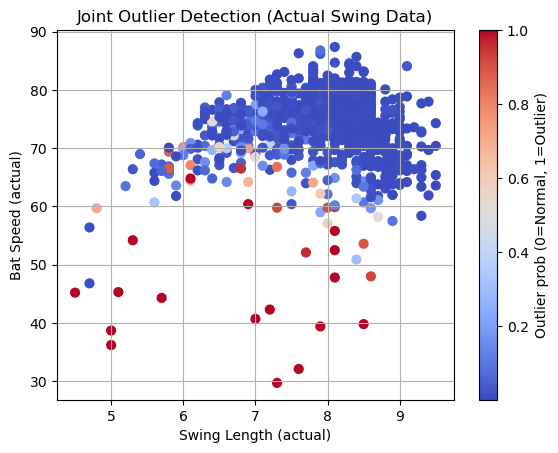

In [9]:
plt.scatter(luis_robert["swing_length"], luis_robert["bat_speed"],
            c=luis_robert["outlier_prob"], cmap="coolwarm", s=40)
plt.colorbar(label="Outlier prob (0=Normal, 1=Outlier)")
plt.xlabel("Swing Length (actual)")
plt.ylabel("Bat Speed (actual)")
plt.title("Joint Outlier Detection (Actual Swing Data)")
plt.grid(True)
plt.show()

In [12]:
from baseball_utilities.display import *
set_pandas_display_all()

In [13]:
luis_robert.sort_values(by="outlier_prob", ascending=False)

pitch_type   game_date  release_speed               player_name  \
81984          SL  2024-07-19           88.4               Marsh, Alec   
70745          KC  2024-07-28           85.1             Miller, Bryce   
3403           CH  2024-09-26           78.3           Anderson, Tyler   
116754         FF  2024-06-15           94.8            McGough, Scott   
49277          FF  2024-08-16           95.5       Arrighetti, Spencer   
59821          SL  2024-08-07           80.0               Estes, Joey   
62931          FF  2024-08-04           93.3  Woods Richardson, Simeon   
31698          CU  2024-08-31           78.8            Quintana, Jose   
116728         FF  2024-06-15           97.1            Vieira, Thyago   
59860          FF  2024-08-07           91.2               Estes, Joey   
59858          ST  2024-08-07           77.8               Estes, Joey   
116729         SL  2024-06-15           88.1            Vieira, Thyago   
55486          FF  2024-08-10           93.0            Steele, Justin   
69734          SI  2024-07-29           93.4               Marsh, Alec   
5387           SI  2024-09-24           96.3         Kochanowicz, Jack   
40051          SL  2024-08-24           89.6             Skubal, Tarik   
5389           SI  2024-09-24           95.9         Kochanowicz, Jack   
73487          SL  2024-07-26           88.2             Kirby, George   
3371           CH  2024-09-26           81.3          Rosenberg, Kenny   
62930          SL  2024-08-04           85.9  Woods Richardson, Simeon   
14476          CH  2024-09-16           88.6            Zuñiga, Guillo   
22667          ST  2024-09-08           80.8            Fitts, Richard   
28308          CU  2024-09-03           78.7              Povich, Cade   
8862           SL  2024-09-21           88.7             Scott, Tanner   
113457         CU  2024-06-18           81.3           Valdez, Framber   
55522          FF  2024-08-10           92.9            Steele, Justin   
35207          FF  2024-08-28           95.6              Leiter, Jack   
46811          CH  2024-08-18           91.7           Valdez, Framber   
13278          SL  2024-09-17           86.0          Canning, Griffin   
65588          FF  2024-08-02           94.4                 Ryan, Joe   
35253          FF  2024-08-28           97.3              Leiter, Jack   
65621          FS  2024-08-02           90.4                 Ryan, Joe   
113427         FF  2024-06-18           96.5           Montero, Rafael   
19558          FF  2024-09-11           94.0             Boyd, Matthew   
30375          FF  2024-09-01           92.5              Manaea, Sean   
111230         FF  2024-06-20           97.2              Abreu, Bryan   
60971          FF  2024-08-06           95.6            Reyes, Gerardo   
104284         SL  2024-06-26           88.9              Stone, Gavin   
20753          SL  2024-09-10           86.8               Morgan, Eli   
56932          SI  2024-08-09           91.5          Taillon, Jameson   
10213          FC  2024-09-20           88.9             Musgrove, Joe   
80733          SI  2024-07-20           93.9             Singer, Brady   
71991          SL  2024-07-27           86.6             Muñoz, Andrés   
44032          SI  2024-08-21           93.3               Webb, Logan   
45298          SL  2024-08-20           71.7             Rogers, Tyler   
104210         SI  2024-06-26           94.9              Stone, Gavin   
104227         SL  2024-06-26           86.1              Stone, Gavin   
17596          SI  2024-09-13           96.7           Ferguson, Tyler   
23852          SI  2024-09-07           87.4          Criswell, Cooper   
127882         SI  2024-06-05           93.0          Taillon, Jameson   
30339          SL  2024-09-01           91.7               Díaz, Edwin   
40050          FF  2024-08-24           97.8             Skubal, Tarik   
84526          FF  2024-07-13           96.9            Ortiz, Luis L.   
7821       

In [15]:
batter_outlier_avg = (
    swings_2024
    .groupby("batter")
    .agg(
        total_outlier_prob=("outlier_prob", "sum"),
        num_swings=("batter", "size")  # counts all swings including NaNs
    )
    .assign(avg_outlier_prob=lambda df: df["total_outlier_prob"] / df["num_swings"])
    .sort_values("avg_outlier_prob", ascending=False)
)

In [16]:
batter_outlier_avg.head(10)

total_outlier_prob  num_swings  avg_outlier_prob
batter                                                  
664983          400.005202         800          0.500007
665862          507.881185        1016          0.499883
665926          432.505000        1219          0.354803
514888          331.861284        1120          0.296305
661388          347.867662        1202          0.289407
650489          324.074058        1210          0.267830
678662          354.595408        1420          0.249715
665489          278.000668        1150          0.241740
670032          167.127532         711          0.235060
650490          229.799659         992          0.231653

In [37]:
jake_mccarthy = swings_2024[swings_2024["batter"] == 650490]

In [38]:
jake_mccarthy.sort_values(by="outlier_prob", ascending=True)

pitch_type   game_date  release_speed               player_name  \
5611           CH  2024-09-24           84.8             Skubal, Tarik   
15215          SI  2024-09-15           89.1               Lively, Ben   
105299         FF  2024-06-26           95.6             Kirby, George   
93610          CH  2024-07-06           85.8               Latz, Jacob   
74276          FC  2024-07-26           89.4            Martinez, Nick   
25112          SI  2024-09-06           89.6              Kremer, Dean   
94935          CH  2024-07-05           87.1               Latz, Jacob   
106475         SI  2024-06-25           93.8            Castillo, Luis   
93609          CH  2024-07-06           84.8               Latz, Jacob   
74277          SI  2024-07-26           92.4            Martinez, Nick   
108456         FF  2024-06-23           99.3              Skenes, Paul   
93650          SL  2024-07-06           83.7            Heaney, Andrew   
73006          ST  2024-07-27           85.7            Abbott, Andrew   
129445         CH  2024-06-04           89.0         Brazobán, Huascar   
64056          CH  2024-08-03           85.0             Blanco, Ronel   
108455         ST  2024-06-23           83.8              Skenes, Paul   
126493         FF  2024-06-07           92.9            Kimbrel, Craig   
179135         FF  2024-04-20           91.9            Cortes, Nestor   
94980          FF  2024-07-05           93.3         Lorenzen, Michael   
182149         SL  2024-04-17           84.9             Detmers, Reid   
96661          FF  2024-07-03           94.6           McArthur, James   
5659           CH  2024-09-24           87.0             Skubal, Tarik   
45218          FF  2024-08-20           93.0               Estes, Joey   
165649         ST  2024-05-03           78.7              Young, Danny   
36162          FF  2024-08-28           95.4            Castillo, Luis   
71533          FS  2024-07-28           82.0            Cruz, Fernando   
71582          FF  2024-07-28           92.7            Greene, Hunter   
129471         CH  2024-06-04           85.9            Luzardo, Jesús   
64077          FF  2024-08-03           93.6             Blanco, Ronel   
39115          FF  2024-08-25           95.8              Stone, Gavin   
69303          CH  2024-07-30           87.0           Cabrera, Edward   
25110          FS  2024-09-06           84.0              Kremer, Dean   
15176          SL  2024-09-15           89.5            Gaddis, Hunter   
84206          SI  2024-07-14           90.5               Lively, Ben   
72994          FF  2024-07-27           94.0            Abbott, Andrew   
1283           FC  2024-09-28           87.3          Crawford, Kutter   
53114          SL  2024-08-13           89.4            Kikuchi, Yusei   
85664          FF  2024-07-13           94.3           Williams, Gavin   
25111          FC  2024-09-06           87.1              Kremer, Dean   
191424         FF  2024-04-08           87.9           Anderson, Tyler   
126569         CU  2024-06-07           76.6               Irvin, Cole   
112652         SI  2024-06-19           92.9                 Ryan, Joe   
48639          FF  2024-08-17           95.1               Gallen, Zac   
58717          ST  2024-08-08           81.1              Gibson, Kyle   
5591           CH  2024-09-24           86.0             Brieske, Beau   
181010         CH  2024-04-18           89.2          Canning, Griffin   
103112         FF  2024-06-28           92.9          Parker, Mitchell   
15177          FF  2024-09-15           95.1            Gaddis, Hunter   
98058          FF  2024-07-02           96.5         Hernández, Carlos   
177028         FF  2024-04-22           92.7            Miller, Shelby   
47418          SI  2024-08-18           89.8            Kelly, Merrill   
162020         CH  2024-05-06           82.4            Shuster, Jared   
185773         FF  2024-04-14           92.2              Snell, Blake   
162038     

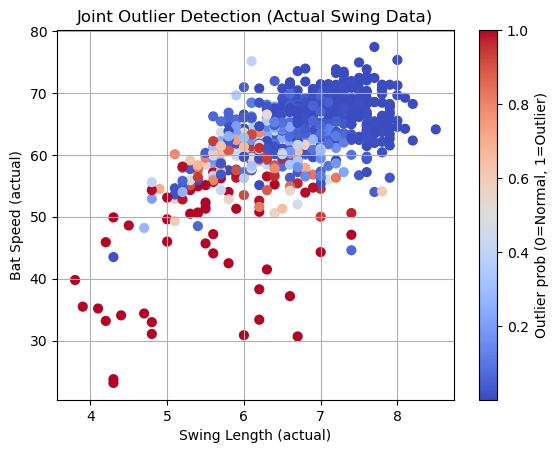

In [36]:
plt.scatter(jake_mccarthy["swing_length"], jake_mccarthy["bat_speed"],
            c=jake_mccarthy["outlier_prob"], cmap="coolwarm", s=40)
plt.colorbar(label="Outlier prob (0=Normal, 1=Outlier)")
plt.xlabel("Swing Length (actual)")
plt.ylabel("Bat Speed (actual)")
plt.title("Joint Outlier Detection (Actual Swing Data)")
plt.grid(True)
plt.show()